In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd

# Import the stats library from numpy
from scipy import stats

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

(0, 1)

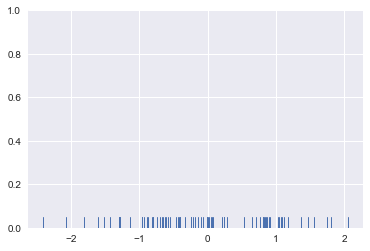

In [5]:
dataset=randn(75)
sns.rugplot(dataset)
plt.ylim(0,1)

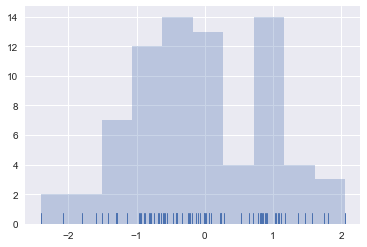

In [6]:
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)

(0, 1)

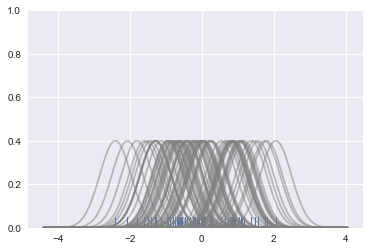

In [7]:
sns.rugplot(dataset)

x_min = dataset.min() - 2
x_max = dataset.max() + 2

x_axis = np.linspace(x_min,x_max,100)
bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2
kernel_list = []
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)


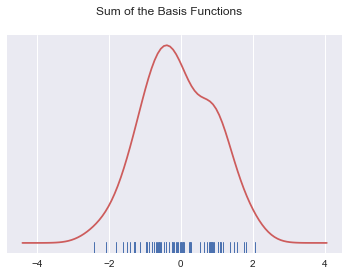

In [10]:
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset)

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

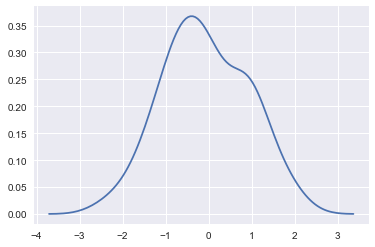

In [11]:
sns.kdeplot(dataset)

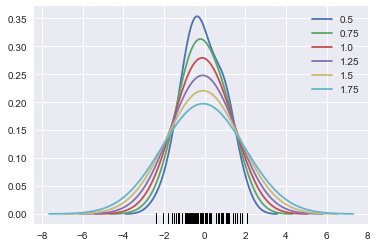

In [12]:
sns.rugplot(dataset,color='black')

# Plot various bandwidths
for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)

In [13]:
kernel_options = ["biw", "cos", "epa", "gau", "tri", "triw"]

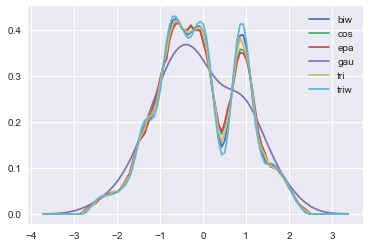

In [14]:
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern)

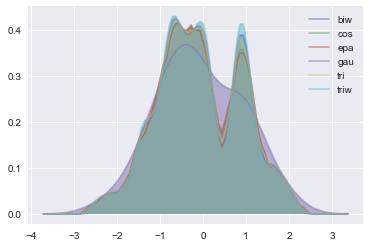

In [15]:
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern,shade=True,alpha=0.5)

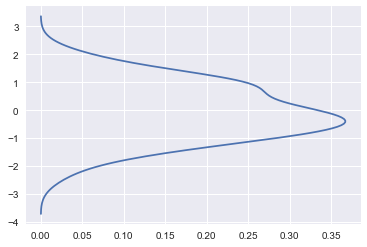

In [17]:
sns.kdeplot(dataset,vertical=True)

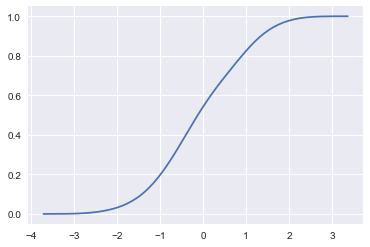

In [18]:
sns.kdeplot(dataset,cumulative=True)

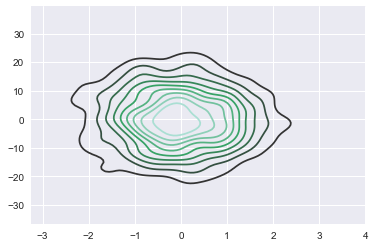

In [19]:
# Let's create a new dataset

# Mean center of data
mean = [0,0]

# Diagonal covariance
cov = [[1,0],[0,100]]

# Create dataset using numpy
dataset2 = np.random.multivariate_normal(mean,cov,1000)

# Bring back our old friend pandas
dframe = pd.DataFrame(dataset2,columns=['X','Y'])

# Plot our dataframe
sns.kdeplot(dframe)

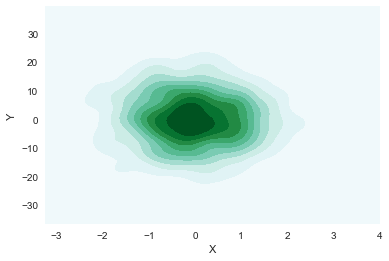

In [20]:
sns.kdeplot(dframe.X,dframe.Y,shade=True)

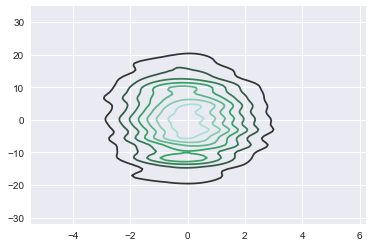

In [21]:
sns.kdeplot(dframe,bw=1)

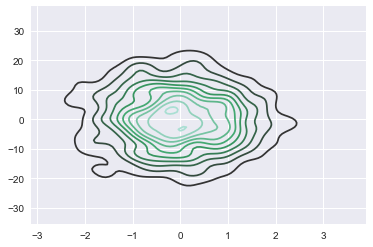

In [22]:
sns.kdeplot(dframe,bw='silverman')

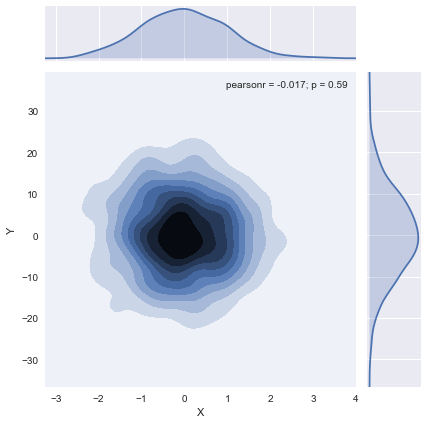

In [23]:
sns.jointplot('X','Y',dframe,kind='kde')